In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [96]:
def get_masked_image(path):
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = 5)
    sobel = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

    _, thresh = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges = cv2.dilate(thresh, np.ones((3, 3), np.uint8))
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key = cv2.contourArea)

    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)
    
    return image, mask

def get_average_color(image, mask):
    red = np.sum(image[:, :, 0] * mask[:, :, 0]) / np.sum(mask[:, :, 0])
    green = np.sum(image[:, :, 1] * mask[:, :, 1]) / np.sum(mask[:, :, 1])
    blue = np.sum(image[:, :, 2] * mask[:, :, 2]) / np.sum(mask[:, :, 2])

    return [red, green, blue]

In [118]:
average_pixels = []
path = "./data_orange_peels"
for subdir in os.listdir(path):
    for file in os.listdir(os.path.join(path, subdir)):
        try:
            image, mask = get_masked_image(os.path.join(path, subdir, file))
            average_color = get_average_color(image, mask/255)
            average_color.append(subdir)
            average_pixels.append(average_color)
        except Exception as e:
            print("Error occured with image {}: {}".format("{}/{}".format(subdir, file), e))

KeyboardInterrupt: 

In [111]:
average_pixels = np.array(average_pixels, dtype=np.float32)

In [114]:
average_pixels

array([[  60,   46,   41,   10],
       [ 114,  106,  104,   10],
       [  72,   55,   49,   10],
       ...,
       [-111, -118, -114,    6],
       [-103, -113, -110,    6],
       [-103, -113, -107,    6]], dtype=int8)

In [117]:
average_pixels[:, 0]

array([  60,  114,   72,  117,   67,   65, -109, -106, -114, -100, -108,
       -107, -128,   81,   49, -114,   57, -102, -128,   77,  122,   86,
         63,   82, -114,  102,   42,  115, -101, -119,   68, -110, -102,
        -98,   59,   57,  -95, -125, -124,   58, -101,  125, -102,   67,
       -103, -108, -120, -107, -114,   90,   50, -104,  -99,   61, -111,
        -99,  -97, -103, -109, -123,  109, -103, -110, -102, -103, -114,
         91,   47, -106, -103,   80,  -97, -101, -120, -103, -106,  -99,
        111,   73, -119,   56, -108,   58, -101,  -99, -116,  -98, -101,
        121,   64, -108,  -97, -121,  -94,   84, -107, -113,  -99, -100,
       -112, -102,  -98,   91,  -98,  -98, -124, -101, -118, -108,  101,
         64,  122,  -98,  -96,   77, -105, -100, -103, -104,  -99,   84,
       -116, -108,  102, -107, -108,  -95, -102,  -99,   63, -102, -102,
       -101,   87,  -94,  127,   55, -109, -111,  -97, -101, -106,  114,
         56, -117,   89, -116,   51,   94,   47,   

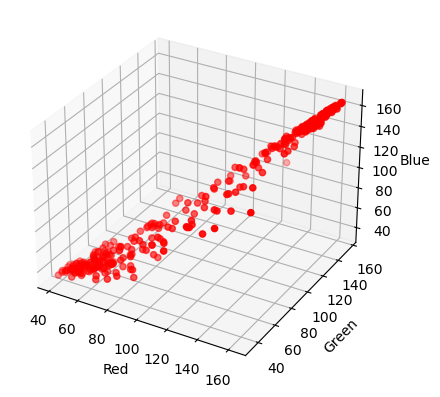

In [106]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
reds = [ pixel[0] for pixel in average_pixels ]
greens = [ pixel[1] for pixel in average_pixels ]
blues = [ pixel[2] for pixel in average_pixels ]
ax.scatter(reds, greens, blues, c = "r", marker = "o")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()